In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('../input/black-friday'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

../input/black-friday/train.csv
../input/black-friday/test.csv


In [3]:

train = pd.read_csv('../input/black-friday/train.csv')

# Read test data
test = pd.read_csv('../input/black-friday/test.csv')

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
train.shape


(550068, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
test.shape

(233599, 11)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [12]:
def missing(df):
    missing_values=df.isnull().sum()
    missing_percentage=missing_values*100/len(df['User_ID'])
    missing_percentage=missing_percentage.sort_values(ascending=False)
    return missing_percentage

In [13]:
missing(train)

Product_Category_3            69.672659
Product_Category_2            31.566643
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

In [14]:
missing(test)

Product_Category_3            69.590195
Product_Category_2            30.969311
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

In [15]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

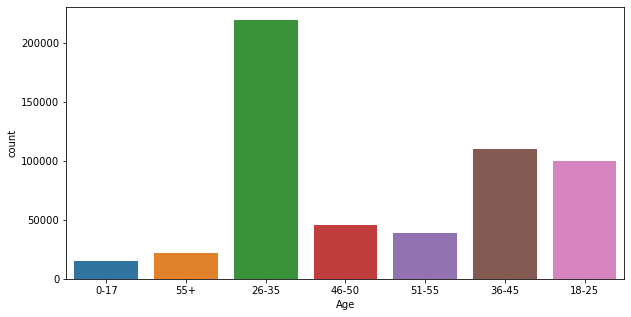

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(train['Age'])

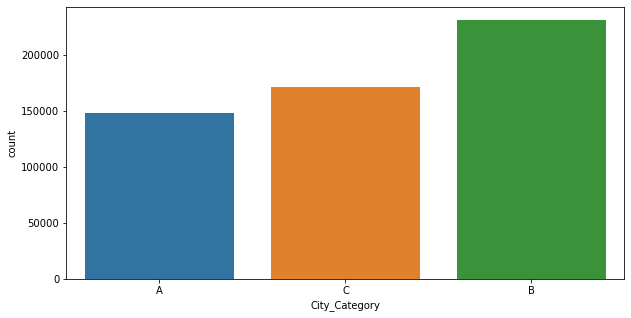

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(train['City_Category'])

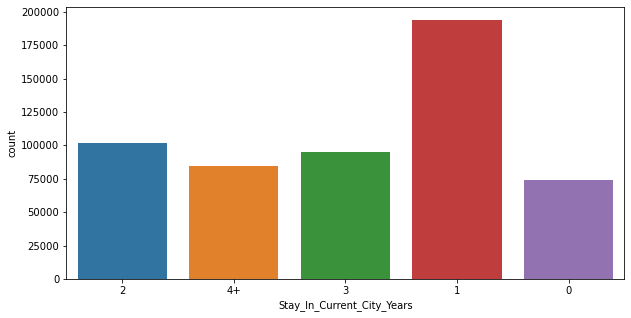

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(train['Stay_In_Current_City_Years'])

In [19]:
train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [20]:
train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
train['User_ID'] = train['User_ID'] - 1000000
test['User_ID'] = test['User_ID'] - 1000000

enc = LabelEncoder()
train['User_ID'] = enc.fit_transform(train['User_ID'])
test['User_ID'] = enc.transform(test['User_ID'])

In [22]:
train['Product_ID'] = train['Product_ID'].str.replace('P00', '')
test['Product_ID'] = test['Product_ID'].str.replace('P00', '')

scaler = StandardScaler()
train['Product_ID'] = scaler.fit_transform(train['Product_ID'].values.reshape(-1, 1))
test['Product_ID'] = scaler.transform(test['Product_ID'].values.reshape(-1, 1))

In [23]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,0,0.722139,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,0,-0.845799,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,0,-0.869157,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1,1.077382,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [24]:
categorical_col = ['Gender', 'City_Category']
numerical_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 
           'Product_Category_2', 'Product_Category_3']

In [25]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,3,-0.445785,M,46-50,7,B,2,1,1,11.0,NaN
1,8,-0.596642,M,26-35,17,C,0,0,3,5.0,NaN
2,9,1.106580,F,36-45,1,B,4+,1,5,14.0,NaN
3,9,-0.286169,F,36-45,1,B,4+,1,4,9.0,NaN
4,10,-1.176711,F,26-35,1,C,1,0,4,5.0,12.0


In [30]:
train['Age'].unique

<bound method Series.unique of 0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: Age, Length: 550068, dtype: object>

In [31]:
train['Age']=train['Age'].replace('0-17',17)
train['Age']=train['Age'].replace('18-25',25)
train['Age']=train['Age'].replace('26-35',35)
train['Age']=train['Age'].replace('36-45',45)
train['Age']=train['Age'].replace('46-50',50)
train['Age']=train['Age'].replace('51-55',55)
train['Age']=train['Age'].replace('55+',60)

In [32]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,F,17,10,A,2,0,3,NaN,NaN,8370
1,0,0.722139,F,17,10,A,2,0,1,6.0,14.0,15200
2,0,-0.845799,F,17,10,A,2,0,12,NaN,NaN,1422
3,0,-0.869157,F,17,10,A,2,0,12,14.0,NaN,1057
4,1,1.077382,M,60,16,C,4+,0,8,NaN,NaN,7969


In [33]:
test['Age']=test['Age'].replace('0-17',17)
test['Age']=test['Age'].replace('18-25',25)
test['Age']=test['Age'].replace('26-35',35)
test['Age']=test['Age'].replace('36-45',45)
test['Age']=test['Age'].replace('46-50',50)
test['Age']=test['Age'].replace('51-55',55)
test['Age']=test['Age'].replace('55+',60)

In [34]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+',4)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace('4+',4)

In [36]:
train = train.fillna(0)
test = test.fillna(0)

In [37]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,F,17,10,A,2,0,3,0.0,0.0,8370
1,0,0.722139,F,17,10,A,2,0,1,6.0,14.0,15200
2,0,-0.845799,F,17,10,A,2,0,12,0.0,0.0,1422
3,0,-0.869157,F,17,10,A,2,0,12,14.0,0.0,1057
4,1,1.077382,M,60,16,C,4,0,8,0.0,0.0,7969


In [38]:

encoder = LabelEncoder()

for col in categorical_col:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

In [39]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,0,17,10,0,2,0,3,0.0,0.0,8370
1,0,0.722139,0,17,10,0,2,0,1,6.0,14.0,15200
2,0,-0.845799,0,17,10,0,2,0,12,0.0,0.0,1422
3,0,-0.869157,0,17,10,0,2,0,12,14.0,0.0,1057
4,1,1.077382,1,60,16,2,4,0,8,0.0,0.0,7969


In [40]:

scaler = StandardScaler()

for col in numerical_col:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

In [41]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,0,-2.059570,0.294864,0,0.109801,0,-0.610809,-1.083654,-0.614641,8370
1,0,0.722139,0,-2.059570,0.294864,0,0.109801,0,-1.118912,-0.118323,1.625106,15200
2,0,-0.845799,0,-2.059570,0.294864,0,0.109801,0,1.675656,-1.083654,-0.614641,1422
3,0,-0.869157,0,-2.059570,0.294864,0,0.109801,0,1.675656,1.168785,-0.614641,1057
4,1,1.077382,1,2.094842,1.214734,2,1.660861,0,0.659449,-1.083654,-0.614641,7969


In [42]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,3,-0.445785,1,1.128700,-0.165072,1,0.109801,1,-1.118912,0.686119,-0.614641
1,8,-0.596642,1,-0.320514,1.368046,2,-1.441258,0,-0.610809,-0.279212,-0.614641
2,9,1.106580,0,0.645628,-1.084943,1,1.660861,1,-0.102705,1.168785,-0.614641
3,9,-0.286169,0,0.645628,-1.084943,1,1.660861,1,-0.356757,0.364342,-0.614641
4,10,-1.176711,0,-0.320514,-1.084943,2,-0.665728,0,-0.356757,-0.279212,1.305142


In [43]:
X = train.drop(['Purchase'], axis=1)
y = train[['Purchase']]
X_test = test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)


In [44]:
X_val.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
84432,1026,1.718767,1,1.611771,1.674670,2,0.885331,0,-1.118912,-0.761877,1.945069
72724,5043,0.611186,0,0.645628,0.448175,1,-0.665728,0,-1.118912,1.329673,1.945069
197032,407,-0.569390,0,0.645628,-1.238255,0,0.109801,1,0.659449,1.329673,-0.614641
353704,484,-1.537794,1,-1.286656,-0.625007,0,0.885331,0,-1.118912,1.329673,1.945069
91198,1953,-1.678918,1,-1.286656,-0.625007,1,-1.441258,0,0.151346,0.203454,1.945069


In [45]:
y_train.head()

,Purchase
178247,7800
196647,8677
418590,7966
408727,9852
216416,15804


In [46]:
y_val.head()

,Purchase
84432,19142
72724,15513
197032,7802
353704,15455
91198,4492


In [47]:
reg=linear_model.LinearRegression()
lm_model=reg.fit(X_train,y_train)
pred=lm_model.predict(X_val)

In [48]:
np.sqrt(mean_squared_error(y_val,pred))

4609.769799176727

In [50]:
from xgboost import XGBRegressor

In [51]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_pred, y_val))

print (xgb_reg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1.0, max_delta_step=0, max_depth=6,
             min_child_weight=40, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [ ]:
rmse